In [3]:
import pandas as pd

# Reload the dataset freshly
df = pd.read_csv("Walmart_Cleaned.csv")

# Strip all column names (precaution)
df.columns = df.columns.str.strip()

# Confirm the column is there
print(df.columns)

# Convert Date and set as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Preview
df.head()


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


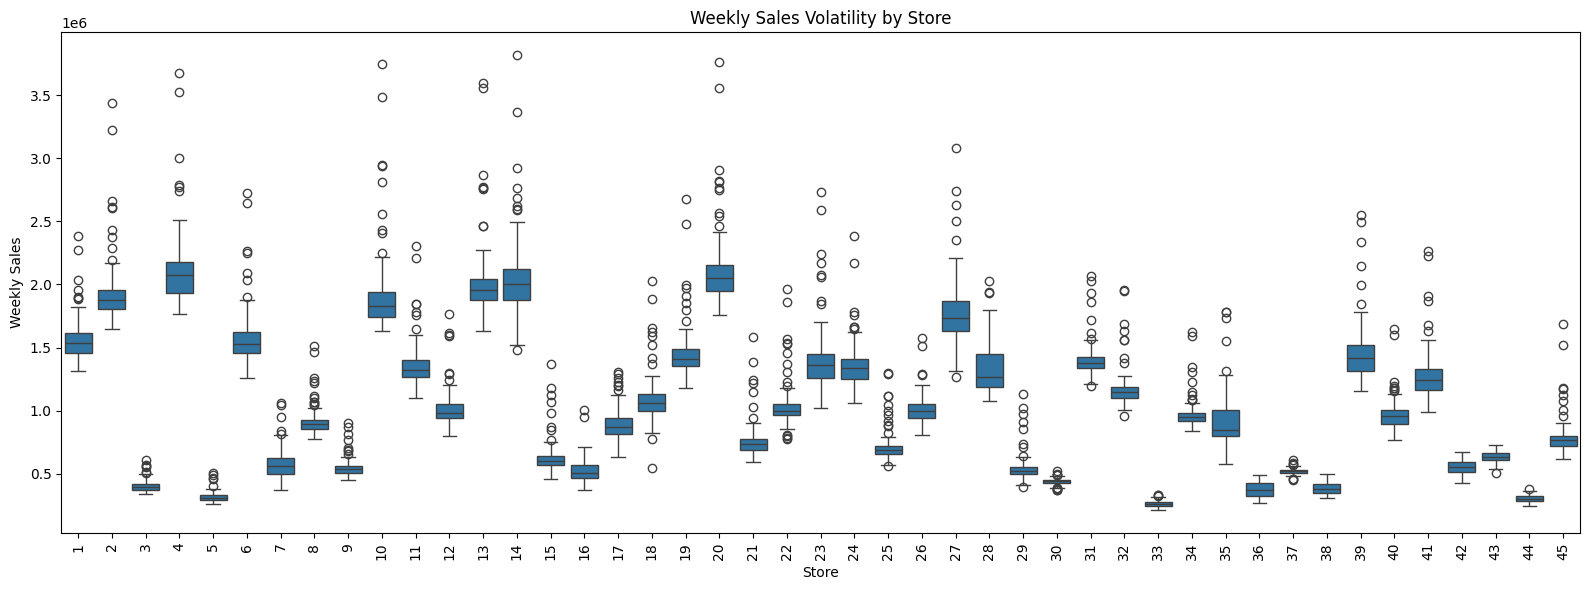

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title("Weekly Sales Volatility by Store")
plt.ylabel("Weekly Sales")
plt.xlabel("Store")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Weekly sales vary widely across stores.

Some stores show high sales with large fluctuations.

Several stores have extreme outlier sales weeks.

Low-sales stores tend to have more stable sales.

Sales volatility suggests different store management needs.

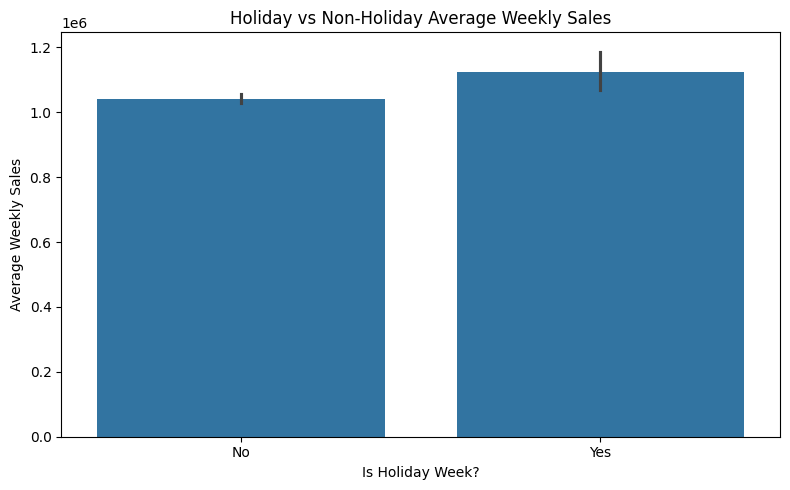

In [5]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Holiday vs Non-Holiday Average Weekly Sales")
plt.xlabel("Is Holiday Week?")
plt.ylabel("Average Weekly Sales")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


Interpretation:
The data confirms that on average, holiday weeks outperform regular weeks in sales.

The presence of error bars helps to visualize uncertainty and is good practice to assess reliability.

Further statistical testing could validate if the difference is statistically significant.

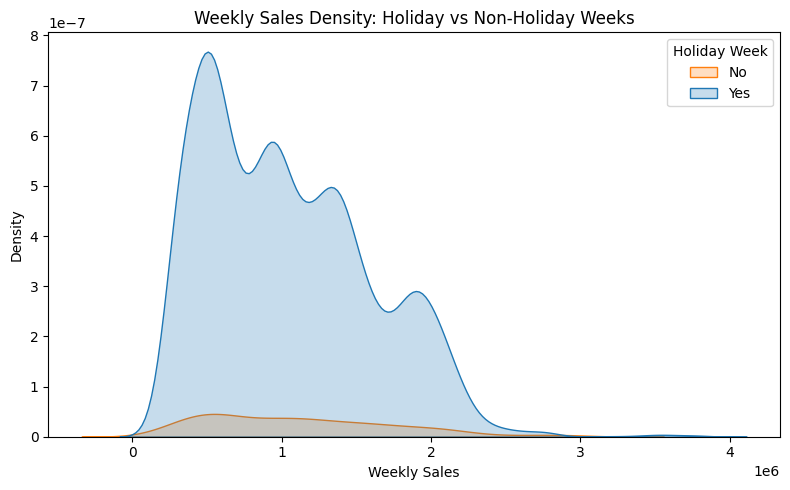

In [6]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Weekly_Sales', hue='Holiday_Flag', fill=True)
plt.title("Weekly Sales Density: Holiday vs Non-Holiday Weeks")
plt.xlabel("Weekly Sales")
plt.ylabel("Density")
plt.legend(title='Holiday Week', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


Interpretation:
The sales distribution during holiday weeks is clearly different and often higher compared to non-holiday weeks.

This suggests that holiday weeks significantly outperform regular weeks in terms of weekly sales, with more sales volume and more variability.

The multiple peaks in the holiday sales density may reflect different types or intensities of holiday promotions or shopping spikes.

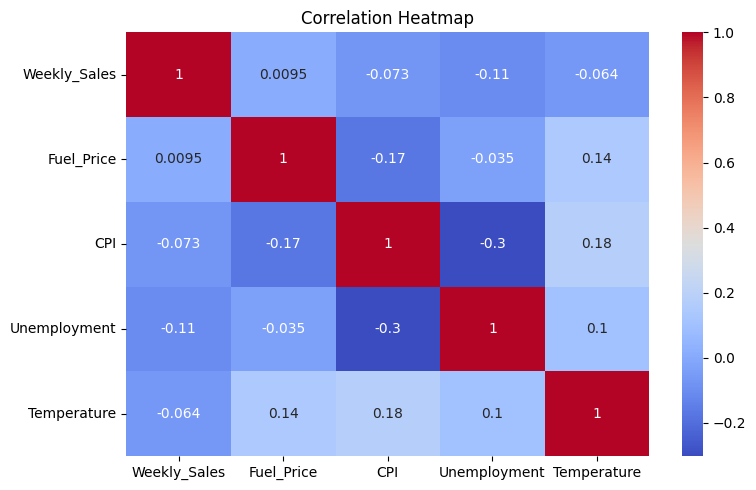

In [7]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment', 'Temperature']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Weekly Sales have almost no correlation with Fuel Price (0.0095), CPI (-0.073), Unemployment (-0.11), or Temperature (-0.064), indicating these factors do not strongly impact sales individually.

Fuel Price has a slight negative correlation with CPI (-0.17), but weak correlations with other variables.

CPI and Unemployment show a moderate negative correlation (-0.3), meaning higher unemployment tends to be associated with lower CPI.

Temperature has weak positive correlations with CPI (0.18) and Unemployment (0.10), but none are strong.

Overall, the dataset variables show weak to very weak correlations, suggesting complex or non-linear relationships may exist beyond simple linear correlation.

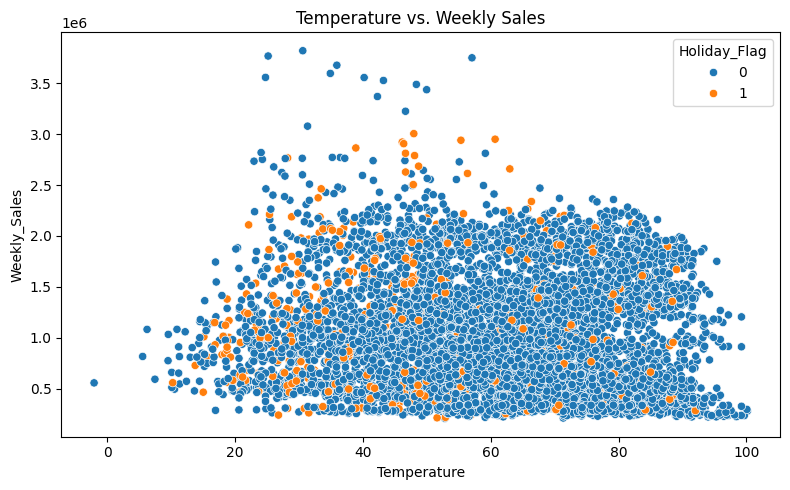

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Holiday_Flag')
plt.title("Temperature vs. Weekly Sales")
plt.tight_layout()
plt.show()


Weekly sales do not show a strong direct correlation with temperature; sales are spread broadly across all temperature ranges.

Holiday weeks (orange points) appear more scattered and less dense compared to non-holiday weeks (blue points), indicating fewer observations during holidays.

There is no clear pattern suggesting that temperature significantly influences sales during holiday or non-holiday weeks.

Sales peak values (close to 3.5-4 million) appear in both low and moderate temperature ranges but are rare overall.

The plot suggests other factors beyond temperature likely play a larger role in driving weekly sales.

In [9]:
store_summary = df.groupby('Store')[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean()

corrs = store_summary.corr()['Weekly_Sales'].drop('Weekly_Sales').sort_values(key=abs, ascending=False)
print("Top 3 factors influencing store performance:\n", corrs.head(3))


Top 3 factors influencing store performance:
 Unemployment   -0.112281
CPI            -0.076569
Temperature    -0.076388
Name: Weekly_Sales, dtype: float64


Unemployment (-0.112) has the strongest negative impact on Weekly Sales among the three factors — as unemployment rises, weekly sales tend to decrease slightly.

CPI (-0.077) (Consumer Price Index) also negatively correlates with sales, implying that higher inflation or prices correspond to a small drop in weekly sales.

Temperature (-0.076) shows a mild negative relationship with sales — higher temperatures are slightly associated with lower sales.